# Scraping - Projet: Twitter Sentiment Analysis

Dans ce fichier, on a mené une enquête pour récupérer les commentaires Twitter sur un sujet: 'hashtag_phrase'

Input: hashtag_phrase

Output:  récupérer le nombre de tweets positifs et le nombre de tweets négatifs.

In [1]:
trained_model_path = 'models_training/Best_models_A/'

In [2]:
# Input number of tweets you want to scrape:
num_tweets = float(input('Combien tweets vous voulez tirer sur chaque hashtag: '))

Combien tweets vous voulez tirer sur chaque hashtag: 200


# I. Importation des packages nécessaires

In [3]:
import json
import csv
import tweepy # Need to install tweepy (pip install tweepy)
import re
import pandas as pd
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

# II. Scraping des tweets

In [4]:
"""
INPUTS:
    consumer_key, consumer_secret, access_token, access_token_secret: codes 
    telling twitter that we are authorized to access this data
    hashtag_phrase: the combination of hashtags to search for
    number_tweets: number of tweets you want to scrape
OUTPUTS:
    none, simply save the tweet info to a spreadsheet
"""
def search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase, num_tweets):
    
    #create authentication for accessing Twitter
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    #initialize Tweepy API
    api = tweepy.API(auth,wait_on_rate_limit=True)
    
    #get the name of the spreadsheet we will write to
    fname = '_'.join(re.findall(r"#(\w+)", hashtag_phrase))

    #open the spreadsheet we will write to
#     with open('%s.csv' % (fname), 'wb') as file:
    with open('%s.csv'%(fname),'w') as file:

        w = csv.writer(file)

        #write header row to spreadsheet
        w.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'followers_count'])

        #for each tweet matching our hashtags, write relevant info to the spreadsheet
        for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets', \
                                   lang="en", tweet_mode='extended').items(num_tweets):
            w.writerow([tweet.created_at, tweet.full_text.replace('\n',' '), tweet.user.screen_name, [e['text'] for e in tweet._json['entities']['hashtags']], tweet.user.followers_count])

# III. Key access

In [5]:
# consumer_key = input('Consumer Key ')
# consumer_secret = input('Consumer Secret ')
# access_token = input('Access Token ')
# access_token_secret = input('Access Token Secret ')
    
# hashtag_phrase = input('Hashtag Phrase ')
consumer_key =  'pwGGcK32G8kUQeWRZDOtZV4Cv'
consumer_secret = '28WPPUNyZu0xFDIQmHrGyxcFKTIZHhfo8F1fqQshDJN5uQmGRi'

access_token = '1217113435537924097-xhraeUONMUDaOgHH9SdNr9SYqenSy6'
access_token_secret = 'xGOOom15zewi2g758bK3bIrRtCRGIoRynlwN2urFToA5T'

# IV. Rechercher des tweets avec: #Megxit

Ici, on récupère les tweets comprenant: #Megxit

In [6]:
hashtag_phrase_1 = '#Megxit'
if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase_1, num_tweets)

In [7]:
df_Megxit = pd.read_csv(hashtag_phrase_1[1:]+'.csv', encoding='utf-8')

In [8]:
df_Megxit.head()

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2020-04-18 15:39:16,@PressSec @realDonaldTrump @CNN And here we go...,VJShordee444,['COVID19'],15134
1,2020-04-18 15:39:15,“Antibody study suggests coronavirus is far mo...,concerned88,['COVID19'],468
2,2020-04-18 15:39:15,New Orleans Family Loses 4 Members to COVID-19...,HarlemNYCUSA,"['COVID', 'COVID19']",238
3,2020-04-18 15:39:14,Mahsi to Julia Christensen for this cogent art...,miki_lou,"['housing', 'Nunavut', 'NWT', 'Denendeh', 'hea...",708
4,2020-04-18 15:39:13,#COVID19 #Coronavirus Coordinated: Specific Mu...,MidwestHort,"['COVID19', 'Coronavirus']",1176


In [9]:
df_Megxit['tweet_text']

0      @PressSec @realDonaldTrump @CNN And here we go...
1      “Antibody study suggests coronavirus is far mo...
2      New Orleans Family Loses 4 Members to COVID-19...
3      Mahsi to Julia Christensen for this cogent art...
4      #COVID19 #Coronavirus Coordinated: Specific Mu...
                             ...                        
195    One of the highlights of our donation was seei...
196    #Mumbai: One more death reported in #Dharavi d...
197    #Canada, U.S. strike deal to extend border res...
198    @adamugarba Before now, people would gather in...
199    I really should turn these notifications off.....
Name: tweet_text, Length: 200, dtype: object

# V. Rechercher des tweets avec: #DataScience

Ici, on récupère les tweets comprenant: #DataScience

In [53]:
hashtag_phrase_2 = '#DataScience'
if __name__ == '__main__':
    search_for_hashtags(consumer_key, consumer_secret, access_token, access_token_secret, hashtag_phrase_2,num_tweets)

In [54]:
df_DataScience = pd.read_csv(hashtag_phrase_2[1:]+'.csv', encoding='utf-8')

In [55]:
df_DataScience.head() 

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2020-01-23 06:34:30,Grande @CasalsTMarti #DataScience #CienciaDeDa...,RayGButler,"['DataScience', 'CienciaDeDatos']",531
1,2020-01-23 06:34:04,Come and Join us with your Talk on different s...,Blockchain20201,"['Blockchain', 'Blockchain', 'DataScience', 'c...",21
2,2020-01-23 06:33:19,"Bomani Jones On The N.B.A., #Analytics, And Ra...",Ronald_vanLoon,"['Analytics', 'BigData', 'DataScience', 'Indus...",209439
3,2020-01-23 06:33:15,Some people talk about how important it is to ...,pip_alise,['datascience'],496
4,2020-01-23 06:31:03,How the following brands leveraged #datascienc...,Edvancer,['datascience'],361


On fusionne par la suite tous les tweets récupérés des deux hashtags: #Megxit et #DataScience dans un même Dataframe

In [56]:
df = pd.merge(df_Megxit,df_DataScience, how='outer')

In [57]:
df.head()

,timestamp,tweet_text,username,all_hashtags,followers_count
0,2020-01-23 05:34:39,Is it because she has cancer? #megxit https://...,rebeccaturnerMD,['megxit'],106
1,2020-01-23 05:31:58,This crazy lady should not be allowed around c...,kegeiger,['megxit'],735
2,2020-01-23 05:25:05,As opposed to a 2nd rate one now?;) @snp @Nico...,rebeccaturnerMD,"['Brexit', 'Megxit', 'Scotxit']",106
3,2020-01-23 05:24:19,Maybe I don't understand markets. I would thin...,WallStreetWaits,['megxit'],2725
4,2020-01-23 05:23:25,@scobie How many times does she need to prove ...,kegeiger,['MEGXIT'],735


# VI. Word2Vec

On a entrepris ici d'utiliser la méthode Word2Vec sur un ensemble de 100 mots issus des tweets récupérés et comprenant 50 mots de #Megxit et 50 mots de #DataScience afin d'en faire une réprésentation et essayer d'en déceler 2 clusters différents.

In [11]:
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords

review_lines = list()
lines = df['tweet_text'].values.tolist()

for line in lines:
        tokens = word_tokenize(line)
        # Making all letters to lower case:
        tokens = [w.lower() for w in tokens]
        #remove punctuation:
        table = str.maketrans('','', string.punctuation)
        stripped=[w.translate(table) for w in tokens]
        #remove tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()] 
        #Remove Stopwords
        stop_words=set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words] 
        #Joining the word list to a sentence:
        review_lines.append(words)

In [59]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(sentences=review_lines,size=300,window=5, workers=4,min_count=1)

## Choisir des 100 mots pour visualisation

In [60]:
vocab = list(model.wv.vocab)

# Selection of 100 words: 50 from #Megxit and 50 from #DataScience
vocab1 = vocab[:50] + vocab[-50:]

# index vector values by corresponding vocab list
X2 = model[vocab1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


## Visualisation 

### 1. Avec TSNE

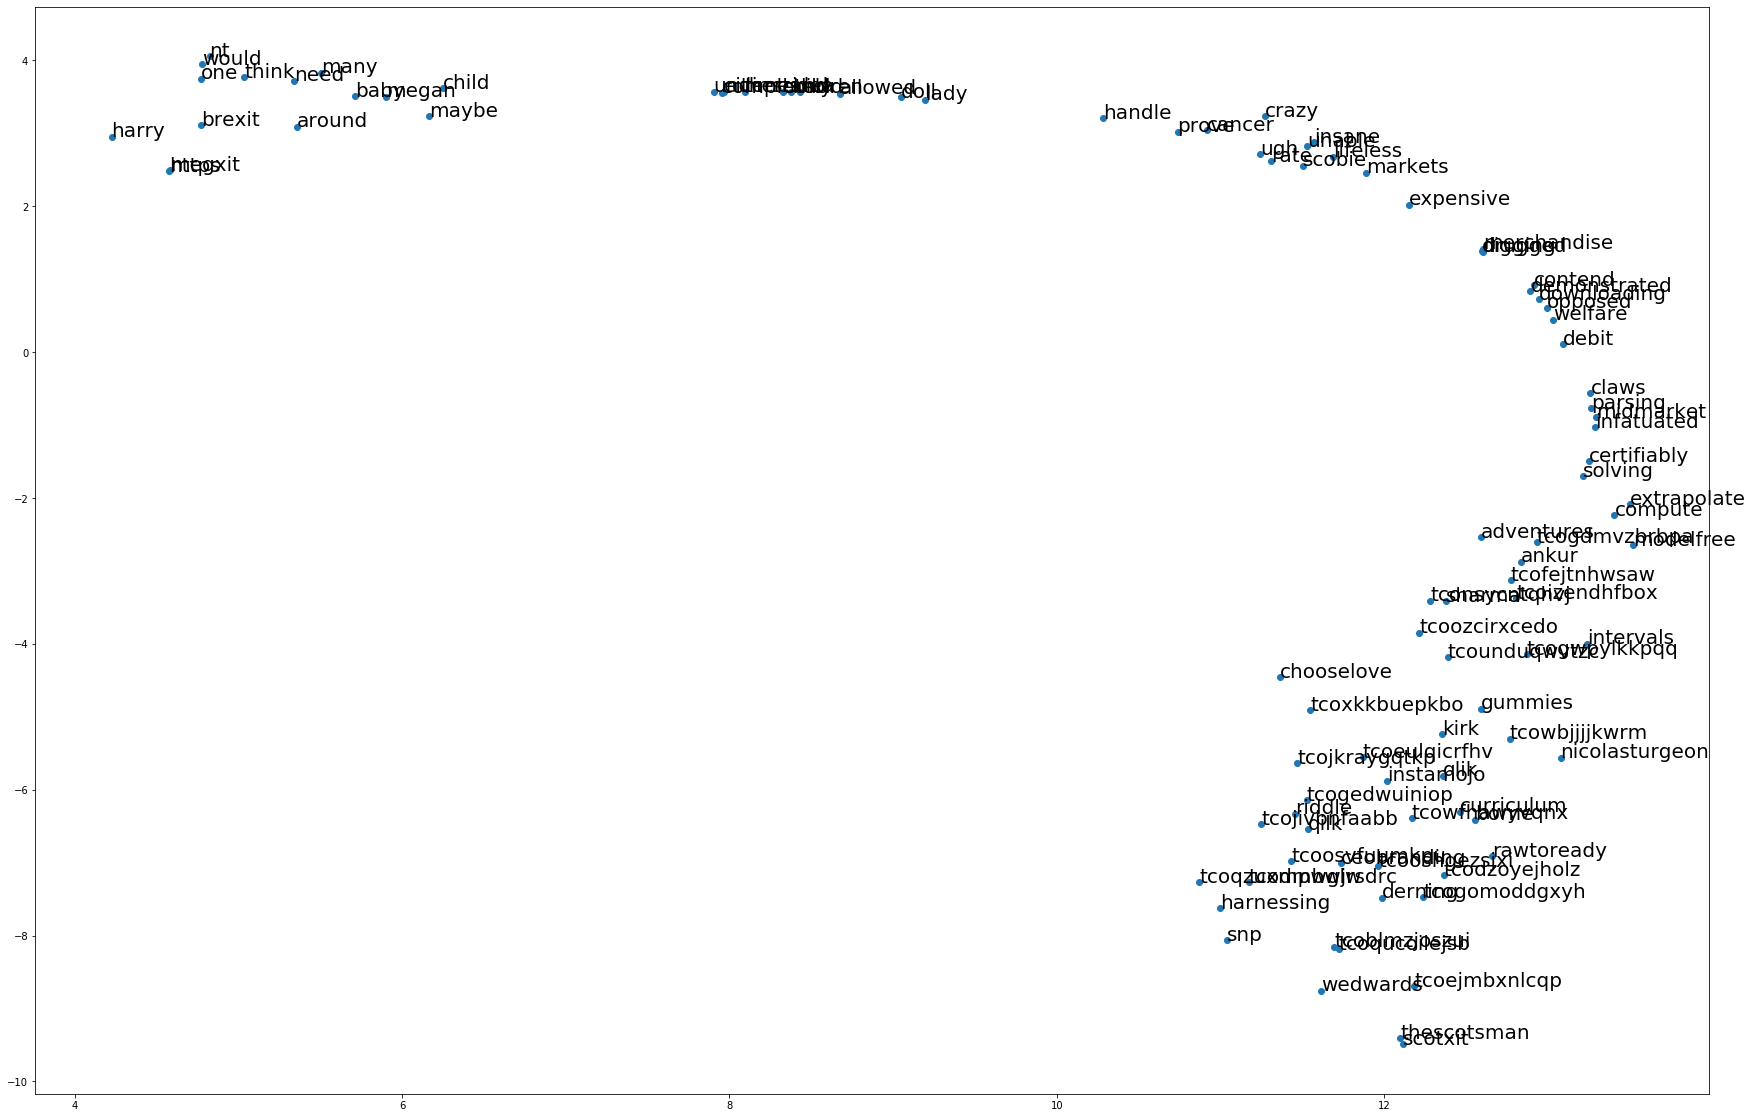

In [61]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X2)

df1 = pd.DataFrame(X_tsne, index = vocab1, columns = ['X','Y'])


fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df1['X'], df1['Y'])
# Put the label on each point.
for word, pos in df1.iterrows():
    ax.annotate(word, pos, fontsize = 20)
    
plt.show();

### 2. Avec PCA

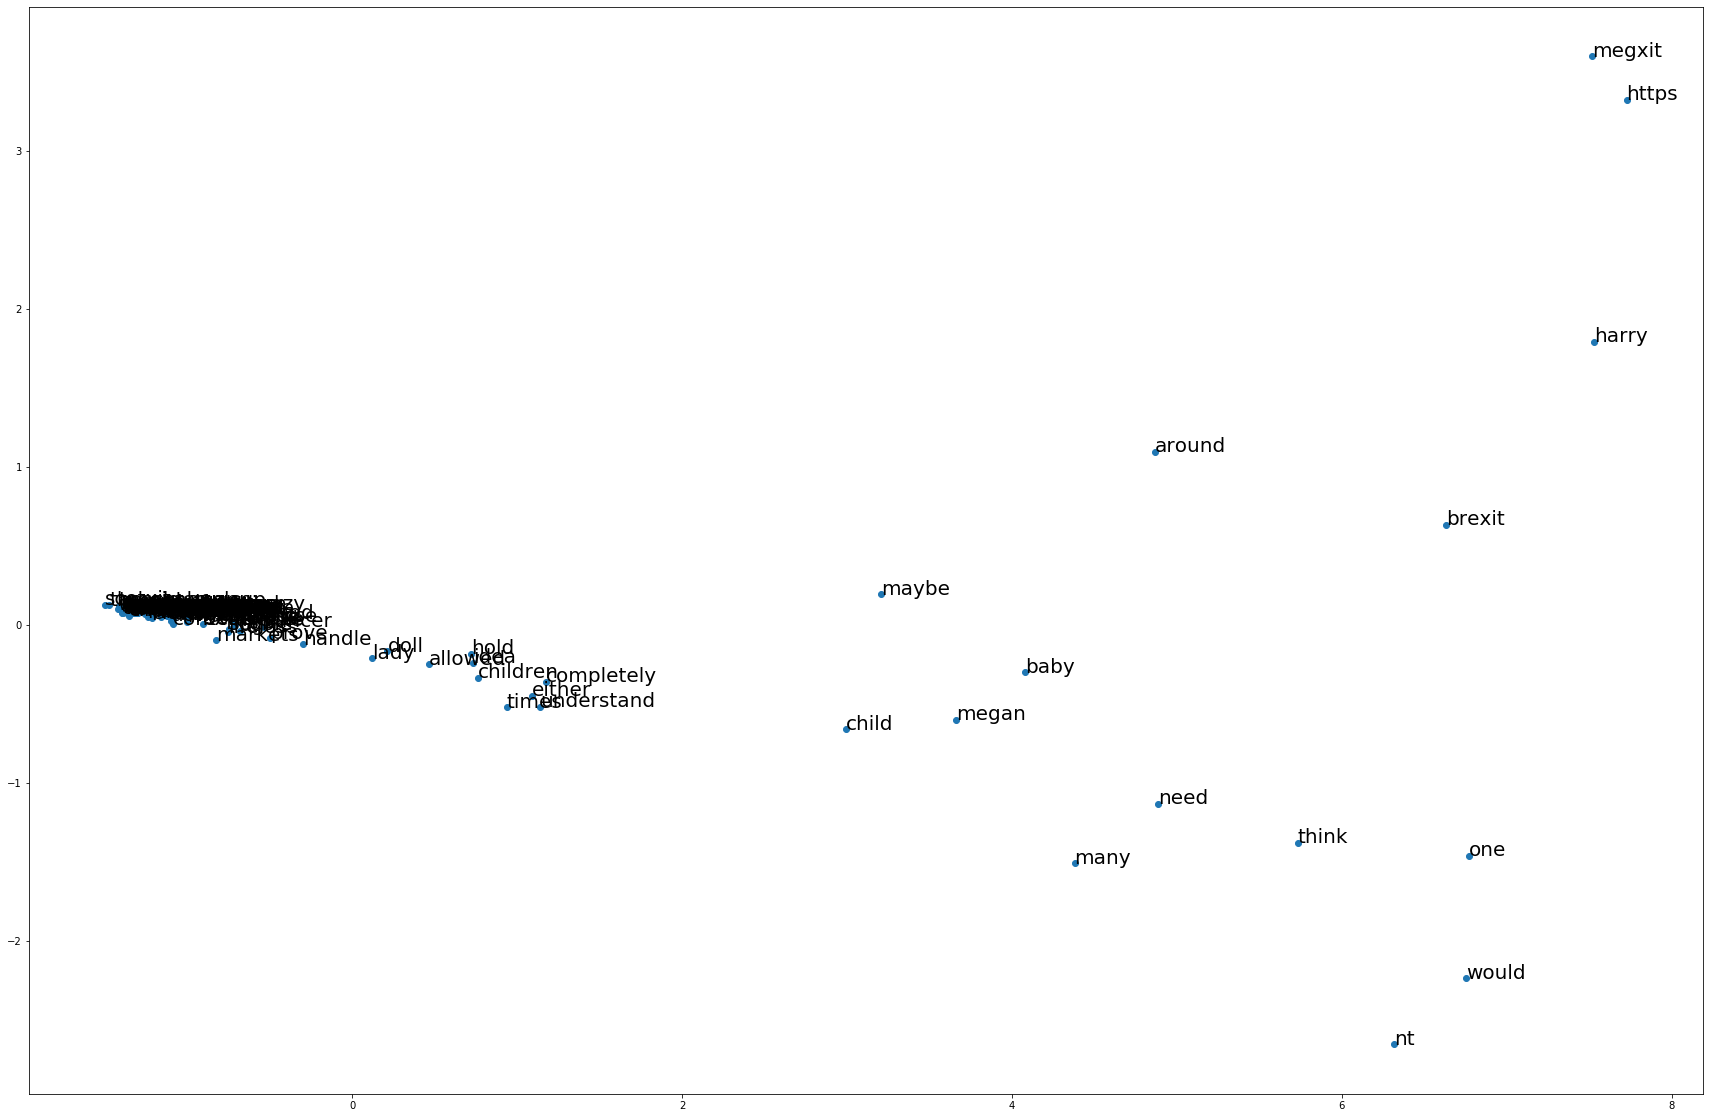

In [62]:
from sklearn.decomposition import PCA
kpca  = PCA(n_components=2)#'rbf': Gaussian kernel 
X_pca = kpca.fit_transform(X2)

df1 = pd.DataFrame(X_pca, index = vocab1, columns = ['X','Y'])


fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df1['X'], df1['Y'])
# Put the label on each point.
for word, pos in df1.iterrows():
    ax.annotate(word, pos, fontsize = 20)
    
plt.show();

**Commentaire:** _On remarque ici sur ce graphe l'apparition de deux clusters. 
Le cluster en bas représente des mots relatifs au Megxit (princeharry, harryandmeghan, royalfamily, meghan, megxit etc).
Le cluster d'en haut est lié principalement à la Data Science avec des mots comme: bayes, learning, windows, version, etc._

# VII. Entraînement du modèle et prédiction des tweets

On commence ici par entraîner notre modèle sur notre jeu de données des tweets

In [12]:
X = df['tweet_text']

In [13]:
vectorizer = pickle.load(open(trained_model_path+'vectorizer.sav', 'rb'))
X = vectorizer.transform(X)

/Users/PhuocNhatDANG/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


L'objectif de la prédiction ci-dessous sur le jeu de données combinant les tweets avec #Megxit et #DataScience est de récupérer le nombre de tweets positifs et le nombre de tweets négatifs.

In [14]:
#Modèle
logreg = pickle.load(open(trained_model_path+'logreg.sav', 'rb'))
# prédiction
y_pred = logreg.predict(X)
# Nombre de tweets positifs et négatifs
count_pos = np.count_nonzero(y_pred == 4)
count_neg = np.count_nonzero(y_pred == 0)

/Users/PhuocNhatDANG/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [15]:
print("Sur " + str(len(y_pred)) +" tweets de " + hashtag_phrase_1+ ' et ' + hashtag_phrase_2 + ", il y a " + str(count_pos) +" tweets positifs et " + str(count_neg)+ " tweets négatifs.")

print(str(count_pos/len(y_pred)*100) + "% tweets sont positifs.")

NameError: name 'hashtag_phrase_2' is not defined

# VIII. Prédiction sur un tweet en particulier

L'objectif de cette seconde évaluation est de prédire la nature du tweet "positif" ou "négatif" à partir d'un tweet en particulier issu du jeu de données combinant les tweets avec #Megxit et #DataScience.

In [67]:
def predict_tweet(num):
    tweet = df['tweet_text'][num]
    print("Le tweet:\n '" + tweet +"' \nest " +'%s' % ("positif." if logreg.predict(X[num].toarray()) == 4 else  "négatif."))

In [68]:
n = 199  # change the number for another tweet
predict_tweet(n) #predict the n-th tweet in df

Le tweet:
 'One thing she is NOT is "naive".  Arrogant, entitled, rude, boorish, narcissistic  and sly, yes.  Naive, no.  #megxit https://t.co/PmBvPc2cDz via @Femail' 
est négatif.


In [69]:
n = 454  # change the number for another tweet
predict_tweet(n) #predict the n-th tweet in df

Le tweet:
 'This coastal Canadian Town could be Harry and Meghan Markle's new home... #Canada #Vancouver #RoyalFamily  #PrinceHarry #MeghanMarkle #Megxit #MeghanAndHarry #Megexit #RoyalCrisis https://t.co/ect1OZ12hJ' 
est positif.


In [70]:
n = 11009  # change the number for another tweet
predict_tweet(n) #predict the n-th tweet in df

Le tweet:
 'High school statistics curriculum #BigData #DS4all via  https://t.co/P5UC3RCDto  https://t.co/TZo1N8MW0X  - https://t.co/j4QEj4RjJj #DataScience thanks @RichardEudes' 
est positif.


In [25]:
# Si vous voulez supprimer les fichiers, il suffir de lancer les deux lignes au dessous:
# os.remove(hashtag_phrase_1[1:]+'.csv')
# os.remove(hashtag_phrase_2[1:]+'.csv')